In [161]:
#General exclusion criteria - accuracy? 

In [3]:
import sys, os
os.chdir('C:\\Users\\Steffi\\Desktop\\PSR\\Analysis')
sys.path.append(os.getcwd()+'/PyGazeAnalyser/')
import pygazeanalyser
from pygazeanalyser.edfreader import read_edf
# append Pygaz analyser folder, cloned from https://github.com/esdalmaijer/PyGazeAnalyser.git

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
%matplotlib inline

from statistics import mean
from scipy.stats import pearsonr


In [4]:
subjects = ['01','02','03','04','05','07','08','09','10','11','12','13','14','16']

## Crowding Task

In [5]:
# Params
total_trials = 720
blocks = 5 #including one practice block
trials_block = total_trials/blocks
trials = total_trials - trials_block #number of trials excluding training
ecc = [4,8,12]
last_trials = 96 #number of trials to calculate critical distance

crowding_files = []
for sub in range(len(subjects)):
    filename = 'C:\\Users\\Steffi\\Desktop\\PSR\\Data\\output_crowding\\data_crowding_pp_%s.csv' %(subjects[sub])
    crowding_files.append(filename)

**Missed trials**

In [165]:
missed_trials = np.zeros(len(subjects))

for sub in range(len(subjects)):
    
    data_sub = pd.read_csv(crowding_files[sub], sep='\t')
    data_sub = data_sub.loc[(trials_block):(total_trials-1)]
    miss = []
    
    for trial in range(int(trials_block),int(total_trials)):
        
        if data_sub['key_pressed'][trial] != "right" and data_sub['key_pressed'][trial] != "left":
            miss.append(1)
            
    missed_trials[sub] = len(miss)/len(data_sub)

In [166]:
#print('Percentage of missed trials per participant')
#print(missed_trials)

**Reaction times and TFR plots**

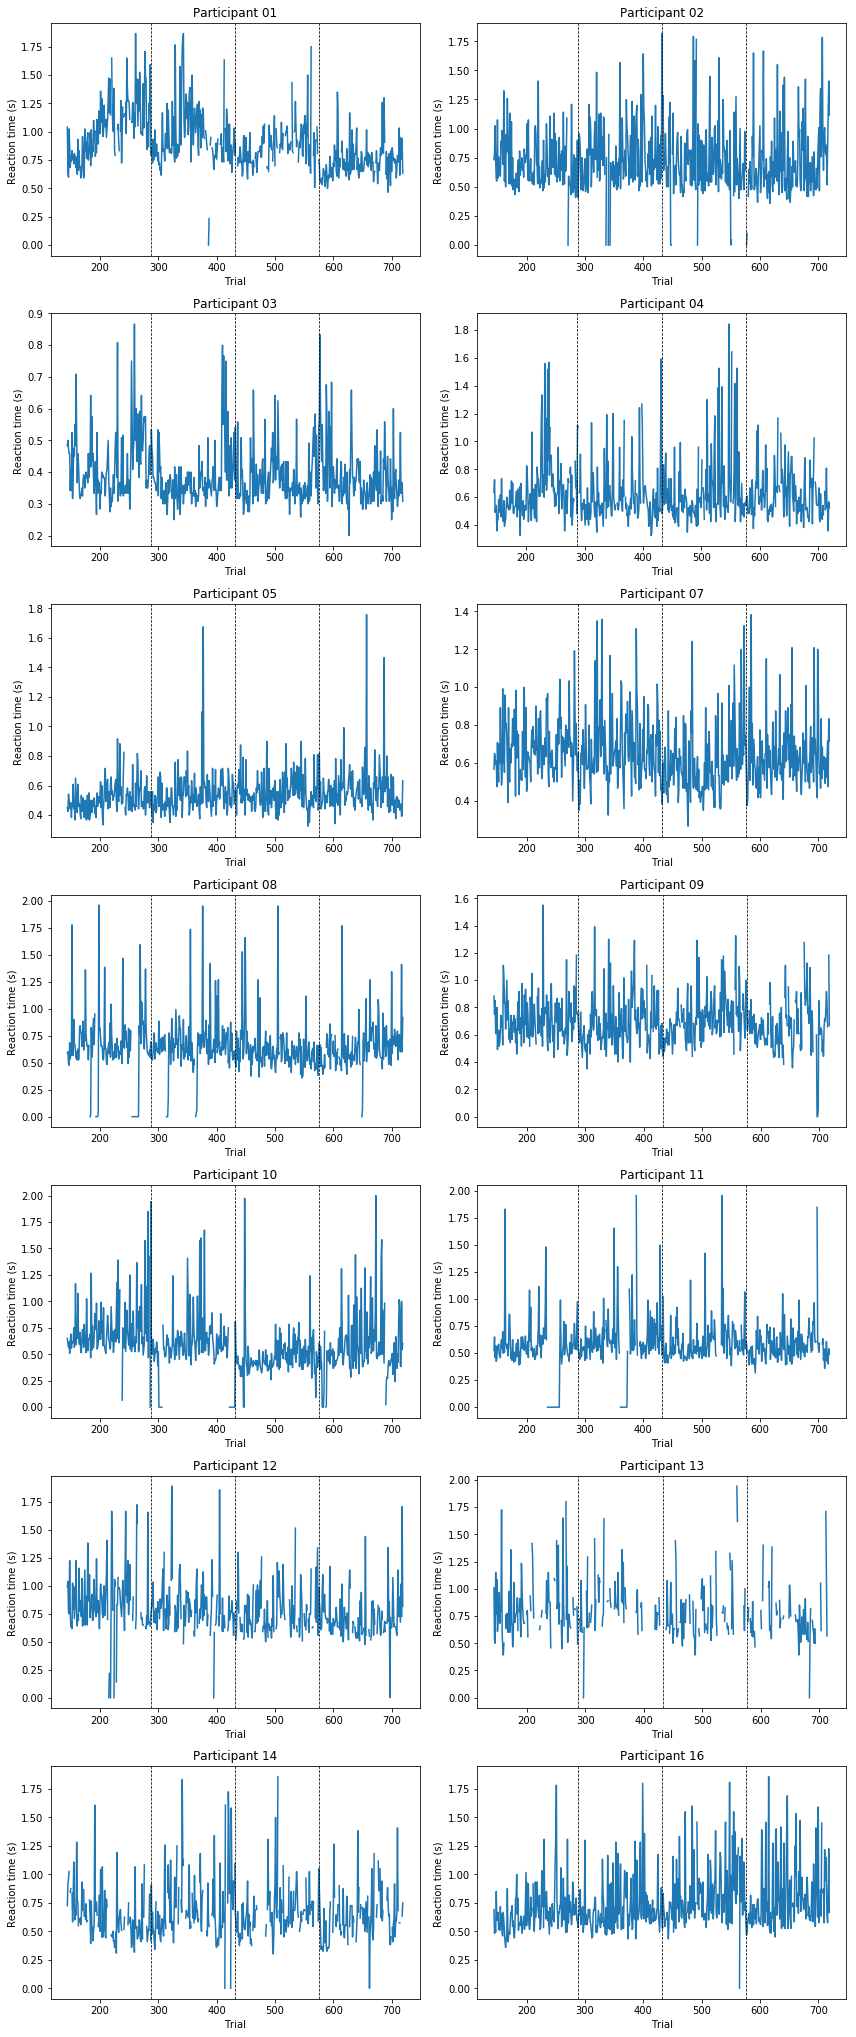

In [167]:
rows = (len(subjects)/2)+1
plt.figure(figsize=(12,rows*4))

for sub in range(len(subjects)):
    data_sub = pd.read_csv(crowding_files[sub], sep='\t')
    data_sub = data_sub.loc[(trials_block):(total_trials-1)]
    plt.subplot(rows,2,sub+1)
    plt.plot(data_sub["RT"])
    plt.ylabel("Reaction time (s) ")
    plt.xlabel("Trial")
    plt.title('Participant %s' %subjects[sub])
    xposition = [288,432,576]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()

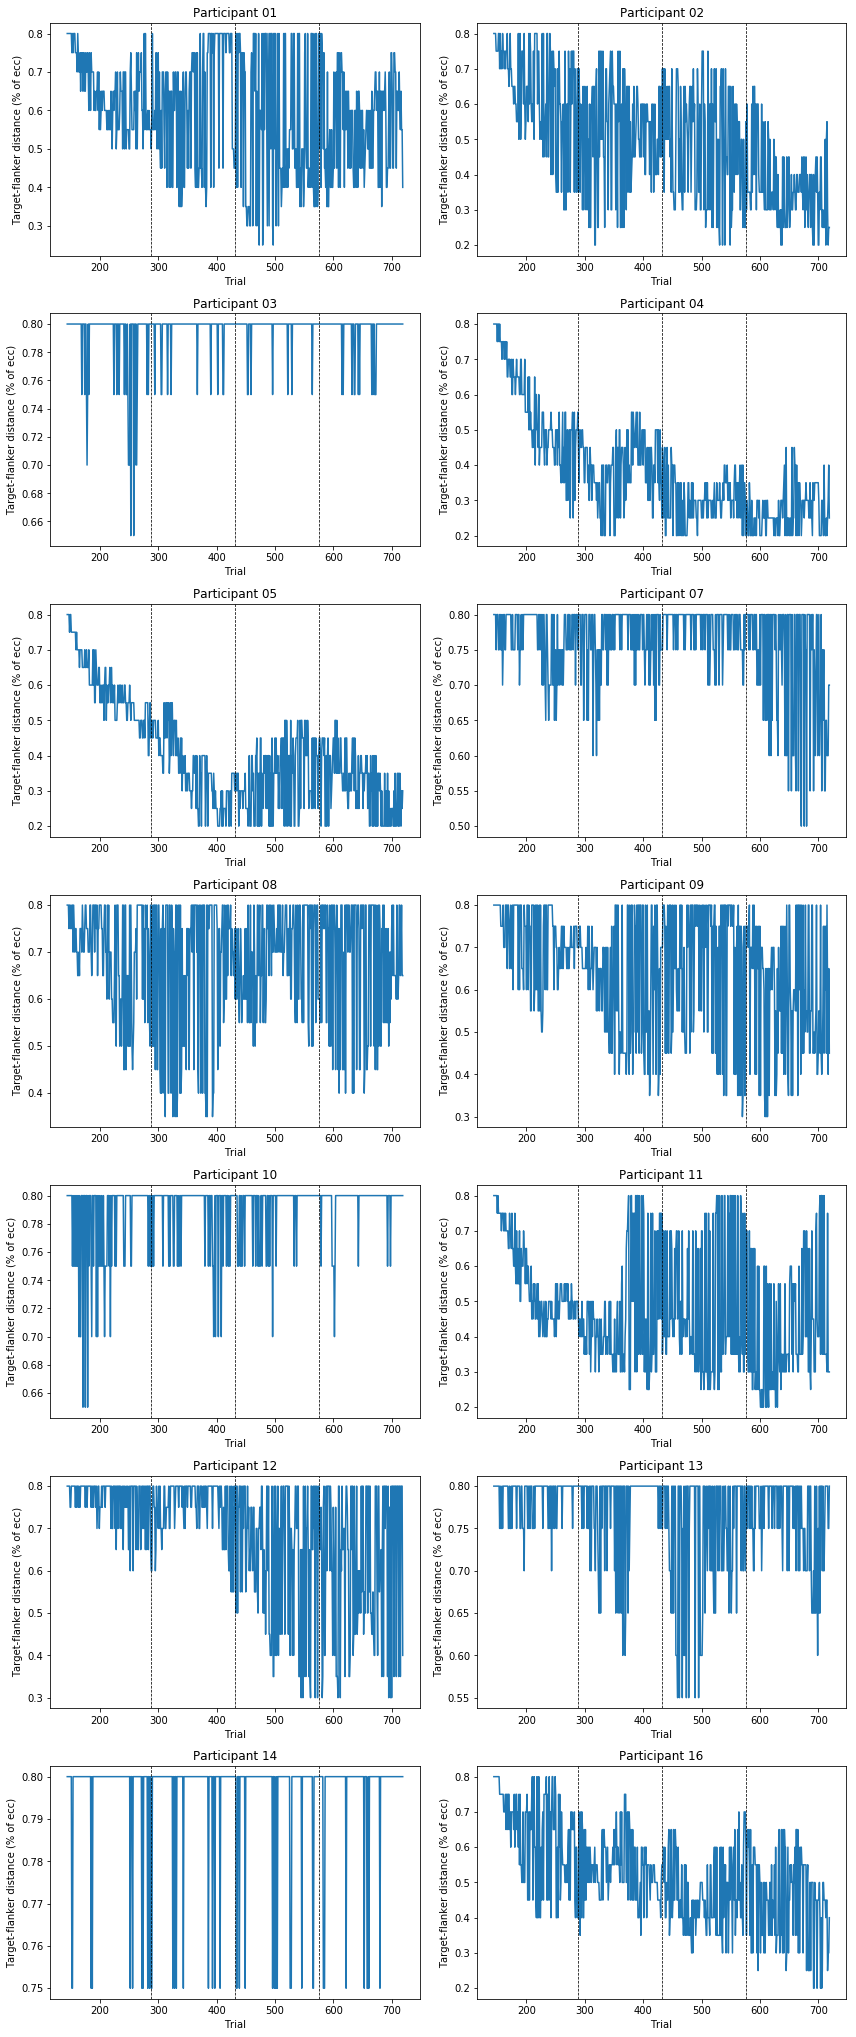

In [168]:
plt.figure(figsize=(12,rows*4))

for sub in range(len(subjects)):
    data_sub = pd.read_csv(crowding_files[sub], sep='\t')
    data_sub = data_sub.loc[(trials_block):(total_trials-1)]
    plt.subplot(rows,2,sub+1)
    plt.plot(data_sub["target_flank_ratio"])
    plt.ylabel("Target-flanker distance (% of ecc)")
    plt.xlabel("Trial")
    plt.title('Participant %s' %subjects[sub])
    xposition = [288,432,576]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()

**Accuracy Flankers vs. no Flankers**

In [169]:
trials_per_ecc = trials/len(ecc)
trials_per_ecc_flank = trials_per_ecc/1.2
trials_per_ecc_noflank = trials_per_ecc/6

acc_ecc_flank = np.zeros((len(subjects), len(ecc)))
acc_ecc_noflank = np.zeros((len(subjects), len(ecc)))

for sub in range(len(subjects)):
    
    data_sub = pd.read_csv(crowding_files[sub], sep='\t')
    data_sub = data_sub.loc[(trials_block):(total_trials-1)]
    
    for e in range(len(ecc)):
        acc_flank = []
        trials_flank = []
        acc_noflank = []
        trials_noflank = []

        for i in range(int(trials_block),int(total_trials)):
            
            if data_sub["flanker_presence"][i]=="flankers" and data_sub["target_ecc"][i]==ecc[e]:
                trials_flank.append(True)
                trials_noflank.append(False)
                
                if data_sub['key_pressed'][i]==data_sub['target_orientation'][i]:
                    acc_flank.append(True)
                else:
                    acc_flank.append(False)
            
            if data_sub['flanker_presence'][i]=="no flankers" and data_sub["target_ecc"][i]==ecc[e]:
                trials_noflank.append(True)
                trials_flank.append(False
                                   )
                if data_sub['key_pressed'][i]==data_sub['target_orientation'][i]:
                    acc_noflank.append(True)
                else:
                    acc_noflank.append(False)
       
        acc_ecc_flank[sub,e]=(sum(acc_flank)/sum(trials_flank))
        acc_ecc_noflank[sub,e]=(sum(acc_noflank)/sum(trials_noflank))

In [170]:
#print("Accuracy with Flankers:")
#print(acc_ecc_flank)
#print("Accuracy without Flankers:")
#print(acc_ecc_noflank)

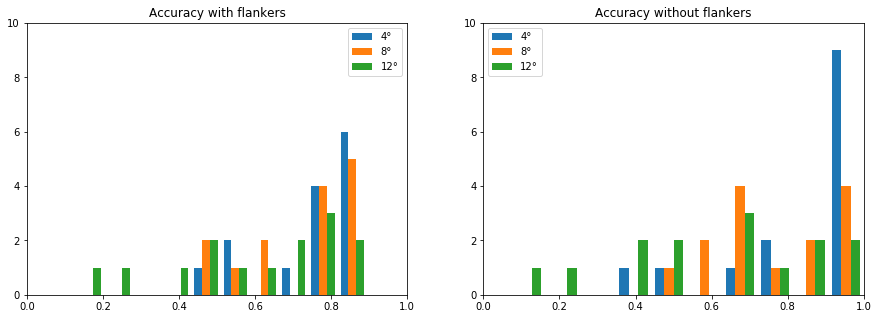

In [171]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(acc_ecc_flank)
plt.title('Accuracy with flankers')
plt.xlim(0,1.0)
plt.ylim(0,10)
plt.legend(['4°','8°','12°'])
plt.subplot(1,2,2)
plt.hist(acc_ecc_noflank)
plt.title('Accuracy without flankers')
plt.xlim(0,1.0)
plt.ylim(0,10)
plt.legend(['4°','8°','12°'])

**Calculate critical distance per participant**

In [172]:
crit_distance = np.zeros((len(subjects),len(ecc)))

for sub in range(len(subjects)):
    
    data_sub = pd.read_csv(crowding_files[sub], sep='\t')
    #data_sub = data_sub.loc[(total_trials-last_trials):(total_trials-1)]
    
    for e in range(len(ecc)):
        
        tfr = []
        
        for i in range((total_trials-last_trials-1),(total_trials-1)):
            
            if data_sub["flanker_presence"][i]=="flankers" and data_sub["target_ecc"][i]==ecc[e]:
                tfr.append(data_sub["target_flank_ratio"][i])
    
        crit_distance[sub,e] = sum(tfr)/len(tfr)

crit_dist_mean = np.mean(crit_distance,axis=1)     

In [173]:
#print('Critical distance per participant and eccentricity')
#print(crit_distance)
#print('Critical distance per participant across eccentricities')
#print(crit_dist_mean)

(0.2, 0.8)

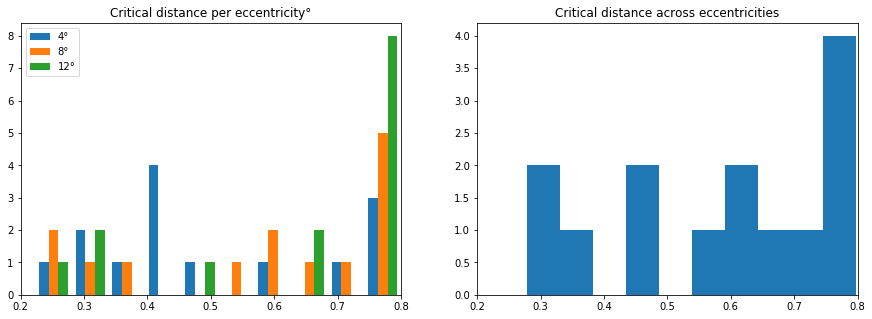

In [174]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(crit_distance)
plt.title('Critical distance per eccentricity°')
plt.xlim(0.2,0.8)
plt.legend(['4°','8°','12°'])

plt.subplot(1,2,2)
plt.hist(crit_dist_mean)
plt.title('Critical distance across eccentricities')
plt.xlim(0.2,0.8)

## Search Task

In [6]:
search_files = []
for sub in range(len(subjects)):
    filename = 'C:\\Users\\Steffi\\Desktop\\PSR\\Data\\output_VS\\data_visualsearch_pp_%s.csv' %(subjects[sub])
    search_files.append(filename)

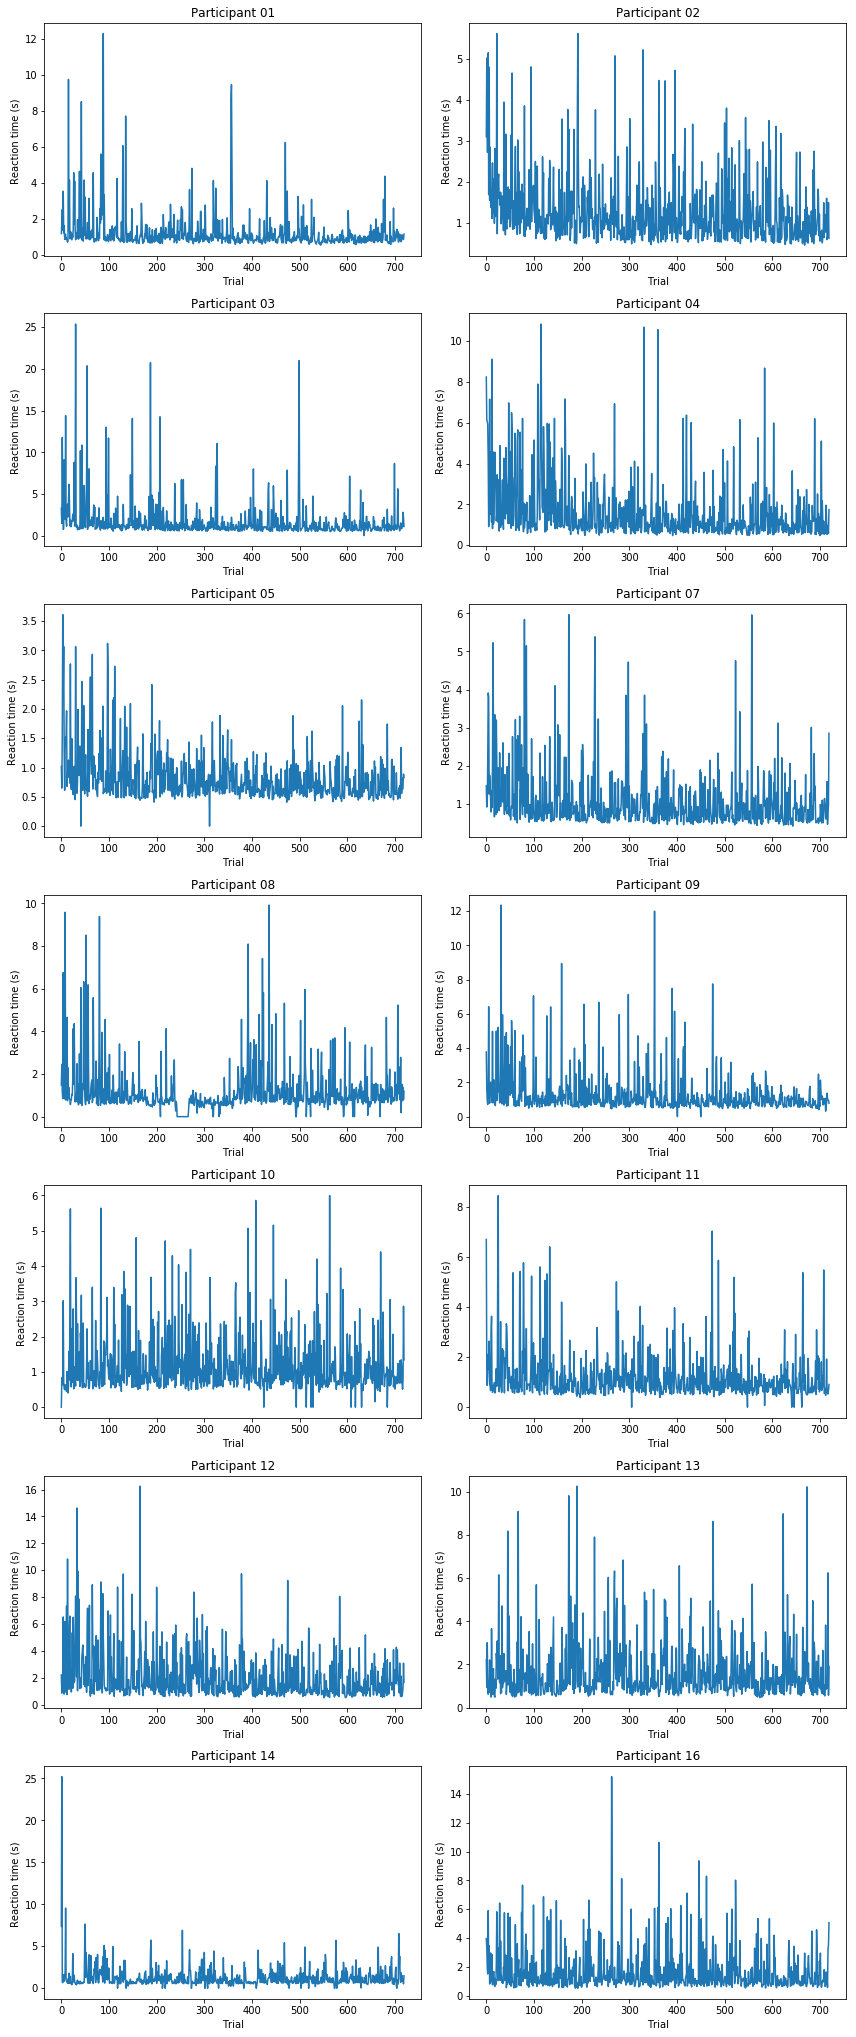

In [176]:
rows = (len(subjects)/2)+1
plt.figure(figsize=(12,rows*4))

for sub in range(len(subjects)):
    data_sub = pd.read_csv(search_files[sub], sep='\t')
    plt.subplot(rows,2,sub+1)
    plt.plot(data_sub["RT"])
    plt.ylabel("Reaction time (s) ")
    plt.xlabel("Trial")
    plt.title('Participant %s' %subjects[sub])
   
plt.tight_layout()

In [9]:
trials = 720
blocks = 4 
trials_block = total_trials/blocks
ecc = [4,8,12]
set_size = [5,15,30]

In [178]:
rt_ecc = np.zeros((len(subjects),len(ecc)))
acc_ecc = np.zeros((len(subjects),len(ecc)))
rt_ecc_std = np.zeros((len(subjects),len(ecc)))
acc_ecc_std = np.zeros((len(subjects),len(ecc)))

for sub in range(len(subjects)):
    data_sub = pd.read_csv(search_files[sub], sep='\t')
    
    for e in range(len(ecc)):
        rts = []
        acc = []
        
        for n in range(len(data_sub)):
            if data_sub['target_ecc'][n]==ecc[e]:
                if data_sub['key_pressed'][n]== data_sub['target_orientation'][n]:
                    rts.append(data_sub["RT"][n])
                    acc.append(True)
                else:
                    acc.append(False)
        
        rt_ecc[sub,e]=np.mean(rts)
        acc_ecc[sub,e]=np.mean(acc)
        rt_ecc_std[sub,e]=np.std(rts)
        acc_ecc_std[sub,e]=np.std(acc)

rt_mean = np.mean(rt_ecc,axis=1)
rt_std = np.std(rt_ecc_mean, axis=1)
acc_mean = np.mean(acc_ecc, axis=1)
acc_std = np.std(acc_ecc_mean, axis=1)

**Reaction times**

In [179]:
#print('Mean reaction times per participant and eccentricity')
#print(rt_ecc)
#print('Standard deviations')
#print(rt_ecc_std)

In [180]:
#print('Mean reaction times per participant across eccentricities')
#print(rt_mean)
#print('Standard deviations')
#print(rt_std)

**Accuracy**

In [181]:
#print('Mean accuracy per participant and eccentricity')
#print(acc_ecc)
#print('Standard deviations')
#print(acc_ecc_std)

In [182]:
#print('Mean accuracy per participant across eccentricities')
#print(acc_mean)
#print('Standard deviations')
#print(acc_std)

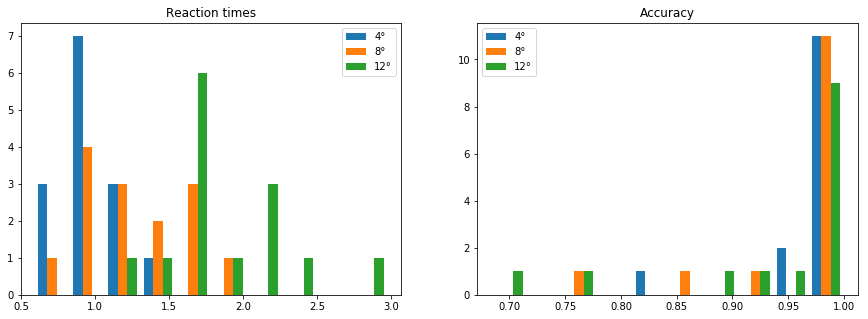

In [183]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(rt_ecc)
plt.title('Reaction times')
plt.legend(['4°','8°','12°'])
plt.subplot(1,2,2)
plt.hist(acc_ecc)
plt.title('Accuracy')
plt.legend(['4°','8°','12°'])

**Reaction times as a function of set size**

In [23]:
rt_setsize = np.zeros((len(subjects),len(set_size)))

for sub in range(len(subjects)):
    data_sub = pd.read_csv(search_files[sub], sep='\t')
    
    for s in range(len(set_size)):
        rts = []
        
        for n in range(len(data_sub)):
            if data_sub['set_size'][n]==set_size[s]:
                if data_sub['key_pressed'][n]== data_sub['target_orientation'][n]:
                    rts.append(data_sub["RT"][n])
        
        rt_setsize[sub,s]=np.mean(rts)
        
rt_setsize_mean = np.mean(rt_setsize,axis=0)

In [24]:
#print('Reaction time per participant and set size')
#print(rt_setsize)
#print('Reaction time per set size across participants')
#print(rt_setsize_mean)

Reaction time per participant and set size
[[0.9569795  1.18945436 1.42091652]
 [0.94894221 1.33590689 1.503021  ]
 [0.98356575 1.57605501 2.46808266]
 [0.9691441  1.80872997 2.06677462]
 [0.70020139 0.80982359 0.93572647]
 [0.81634816 1.10869718 1.24360353]
 [1.06719588 1.24734812 1.40999059]
 [0.8982768  1.40221616 1.52739066]
 [0.86132972 1.25273776 1.43643711]
 [0.93236508 1.3219897  1.3762176 ]
 [1.33732001 2.04274154 2.88737978]
 [1.17942109 1.53566227 2.12757766]
 [1.16608473 1.29506591 1.43362736]
 [1.0770827  1.73321588 2.29015902]]
Reaction time per set size across participants
[0.99244694 1.40426031 1.72335033]


Text(0.5, 1.0, 'Reaction time per set size')

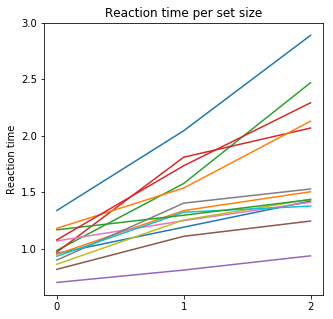

In [20]:
plt.figure(figsize=(5,5))

for sub in range(len(subjects)):
    plt.plot(rt_setsize[sub])

plt.xticks([0,1,2])
plt.ylabel('Reaction time')
plt.title('Reaction time per set size')

## Eyedata

In [184]:
def ang2pix(dist_in_deg,h,d,r): 
    import math 
    
    deg_per_px = math.degrees(math.atan2(0.5*h,d))/(0.5*r)
    dist_in_px = dist_in_deg/deg_per_px
    return dist_in_px 

In [185]:
# paths
os.chdir(r"C:\Users\Steffi\Desktop\PSR\Data")
base_dir = os.getcwd()
output_vs = base_dir+'/output_VS'
output_crwd = base_dir+'/output_crowding'

In [186]:
# params
vRes = 1050
hRes = 1680
ecc = [4,8,12]

gabor_size_deg = 2.2
screen_distance = 50
screen_height = 30

gabor_size_pix = ang2pix(gabor_size_deg,screen_height,screen_distance,vRes)

In [187]:
eye_search_files = []
for sub in range(len(subjects)):
    filename = 'C:\\Users\\Steffi\\Desktop\\PSR\\Data\\output_VS\\pp-%s\\eyedata_visualsearch_pp_%s.asc' %(subjects[sub],subjects[sub])
    eye_search_files.append(filename)

In [188]:
eye_crowd_files = []
for sub in range(len(subjects)):
    filename = 'C:\\Users\\Steffi\\Desktop\\PSR\\Data\\output_crowding\\pp-%s\\eyedata_crowding_pp_%s.asc' %(subjects[sub],subjects[sub])
    eye_crowd_files.append(filename)

**Gaze control crowding task**

In [189]:
fixpos = np.array(((hRes/2),(vRes/2)))
print('Coordinates of fixation:',fixpos)

gaze = np.zeros(len(subjects))

for sub in range(len(subjects)):
    eye_data = read_edf(eye_crowd_files[sub], 'start_trial', stop='stop_trial', debug=False)
    
    deviation = []
    
    for trial in range(len(eye_data)):
        x = eye_data[trial]['x']
        y = eye_data[trial]['y']
        eye_pos = np.array((x,y)).T
        #print(eye_pos)
        for pos in range(len(eye_pos)):
            distance = np.sqrt(np.sum((fixpos-eye_pos[pos])**2))
            #print(distance)
            deviation.append(distance)
            
    gaze[sub]=np.mean(deviation)

Coordinates of fixation: [840. 525.]


In [190]:
#print('Mean deviation from fixation per participant')
#print(gaze)

Text(0, 0.5, 'Pixels')

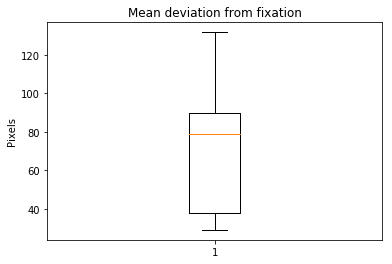

In [191]:
plt.boxplot(gaze)
plt.title('Mean deviation from fixation')
plt.ylabel('Pixels')

**Number of fixations**

In [192]:
ecc_fix = np.zeros((len(subjects),len(ecc)))

for sub in range(len(subjects)):
    eye_data = read_edf(eye_search_files[sub], 'start_trial', stop='stop_trial', debug=False)
    behv_data = pd.read_csv(search_files[sub],sep='\t')
    
    for e in range(len(ecc)):
        num_fix = []
    
        for trial in range(len(eye_data)):
            if behv_data['target_ecc'][trial]==ecc[e]:
                num_fix.append(len(eye_data[trial]['events']['Efix']))
    
        ecc_fix[sub,e] = np.mean(num_fix)

mean_fix = np.mean(ecc_fix,axis=1)

In [193]:
#print('Mean number of fixations per subject and eccentricity')
#print(ecc_fix)
#print('Mean number of fixations per subject across eccentricities')
#print(mean_fix)

Text(0.5, 1.0, 'Number of fixations across eccentricities')

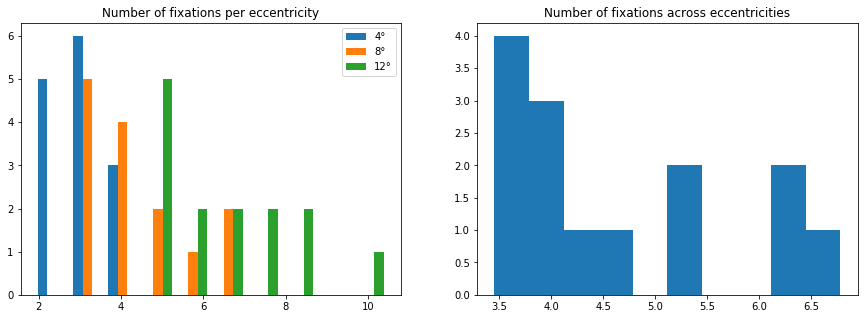

In [194]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ecc_fix)
plt.title('Number of fixations per eccentricity')
plt.legend(['4°','8°','12°'])
plt.subplot(1,2,2)
plt.hist(mean_fix)
plt.title('Number of fixations across eccentricities')

**Latency for leaving fixation**

In [195]:
#Using the duration of the first fixation - seems quite long though?
ecc_lat = np.zeros((len(subjects),len(ecc)))

for sub in range(len(subjects)):
    eye_data = read_edf(eye_search_files[sub], 'start_trial', stop='stop_trial', debug=False)
    behv_data = pd.read_csv(search_files[sub],sep='\t')
    
    for e in range(len(ecc)):
        lat = []
    
        for trial in range(len(eye_data)):
            if behv_data['target_ecc'][trial]==ecc[e] and not eye_data[trial]['events']['Efix']==[]:
                
                lat.append(eye_data[trial]['events']['Efix'][0][2])
    
        ecc_lat[sub,e] = np.mean(lat)

mean_lat = np.mean(ecc_lat,axis=1)

In [196]:
#print('Mean latency for leaving fixation per subject and eccentricity')
#print(ecc_lat)
#print('Mean latency for leaving fixation per subject across eccentricities')
#print(mean_lat)

Text(0.5, 1.0, 'Latency for leaving fixation across eccentricities')

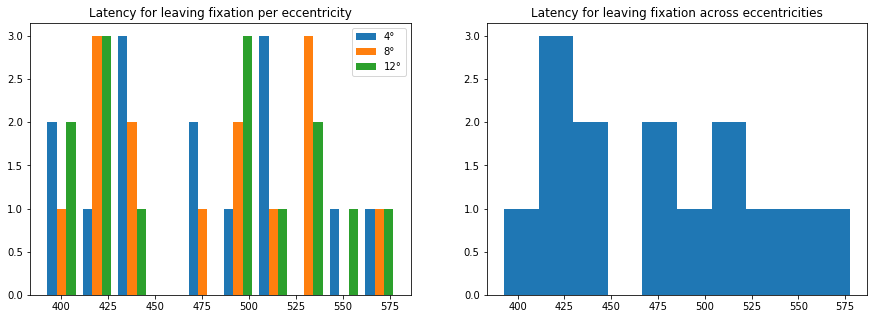

In [197]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ecc_lat)
plt.title('Latency for leaving fixation per eccentricity')
plt.legend(['4°','8°','12°'])
plt.subplot(1,2,2)
plt.hist(mean_lat)
plt.title('Latency for leaving fixation across eccentricities')

**On-/Off-Object Fixation**

In [198]:
fix_dist = np.zeros((len(subjects),len(ecc)))
percent_on_object = np.zeros((len(subjects),len(ecc)))

for sub in range(len(subjects)):
    distances = [[],[],[]]
    on_gabor = [[],[],[]]
    eye_data = read_edf(eye_search_files[sub], 'start_trial', stop='stop_trial', debug=False)
    behv_data = pd.read_csv(search_files[sub],sep='\t')
    
    for trial in range(len(eye_data)):
        #Inês' code to get stimulus positions
        target_srt = behv_data['target_position'][trial].replace(']','').replace('[','').split(' ')
        target_pos = [float(val) for i,val in enumerate(target_srt) if len(val)>1]
        distr_srt = behv_data['distractor_position'][trial].replace(']','').replace('[','').replace(',','').split(' ')
        distr_pos = [float(val) for i,val in enumerate(distr_srt) if len(val)>1]
        target_pos = [target_pos[0]+hRes/2,target_pos[1]+vRes/2]
        alldistr_pos = [distr_pos[i*2:(i+1)*2] for i in range((len(distr_pos))//2)] 
        alldistr_pos = [[alldistr_pos[i][0]+hRes/2,alldistr_pos[i][1]+vRes/2] for i in range((len(distr_pos))//2)]
        alldistr_pos.append(target_pos)
        
        fixations = eye_data[trial]['events']['Efix']
        
        for fix in range(len(fixations)):
            fixpos = np.array([fixations[fix][3],fixations[fix][4]])
            
            for stim in range(len(alldistr_pos)):
                min_dis = 1000
                stimpos = np.array([alldistr_pos[stim][0],alldistr_pos[stim][1]])
                dis = np.sqrt(np.sum((fixpos-stimpos)**2))
                
                if dis < min_dis:
                    min_dis = dis
            
            if behv_data['target_ecc'][trial]==ecc[0]:
                distances[0].append(min_dis)
                if min_dis <= gabor_size_pix:
                    on_gabor[0].append(1)
            elif behv_data['target_ecc'][trial]==ecc[1]:
                distances[1].append(min_dis)
                if min_dis <= gabor_size_pix:
                    on_gabor[1].append(1)
            else:
                distances[2].append(min_dis)
                if min_dis <= gabor_size_pix:
                    on_gabor[2].append(1)

    fix_dist[sub,0] = np.mean(distances[0])
    fix_dist[sub,1] = np.mean(distances[1])
    fix_dist[sub,2] = np.mean(distances[2])
    
    percent_on_object[sub,0]=len(on_gabor[0])/len(distances[0])
    percent_on_object[sub,1]=len(on_gabor[1])/len(distances[1])
    percent_on_object[sub,2]=len(on_gabor[2])/len(distances[2])


mean_fix_dist = np.mean(fix_dist,axis=1)
mean_on_object = np.mean(percent_on_object, axis=1)

In [199]:
#print('Mean distance to next object at fixation per subject and eccentricity')
#print(fix_dist)
#print('Mean distance to next object at fixation per subject across eccentricities')
#print(mean_fix_dist)

In [200]:
#print('Percentage of on-object fixations per subject and eccentricity')
#print(percent_on_object)
#print('Percentage of on-object fixations per subject across eccentricities')
#print('mean_on_object')

Text(0.5, 1.0, 'Percentage of on-object fixations across eccentricities')

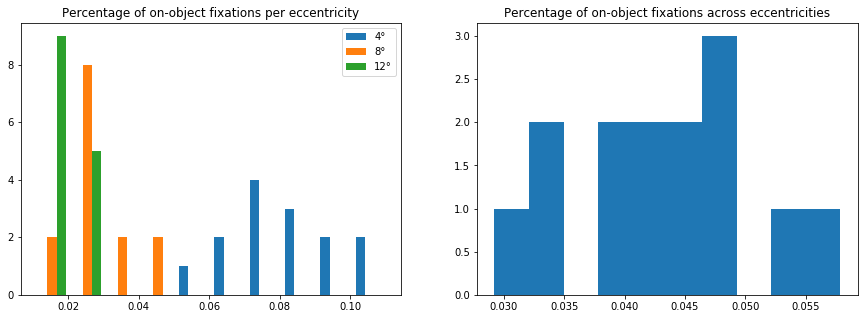

In [201]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(percent_on_object)
plt.title('Percentage of on-object fixations per eccentricity')
plt.legend(['4°','8°','12°'])
plt.subplot(1,2,2)
plt.hist(mean_on_object)
plt.title('Percentage of on-object fixations across eccentricities')

**Time between last fixation and response**

In [202]:
reaction_latency = np.zeros((len(subjects),len(ecc)))

for sub in range(len(subjects)):
    eye_data = read_edf(eye_search_files[sub], 'start_trial', stop='stop_trial', debug=False)
    behv_data = pd.read_csv(search_files[sub],sep='\t')
    
    for e in range(len(ecc)):
        timediff = []
    
        for trial in range(len(eye_data)):
            if behv_data['target_ecc'][trial]==ecc[e] and not eye_data[trial]['events']['Efix']==[]:
                #time between end of last and start of first fixation
                fixtime = (eye_data[trial]['events']['Efix'][-1][1]-eye_data[trial]['events']['Efix'][0][0])/1000
                #print(fixtime)
                #print('RT',behv_data['RT'][trial])
                reactiontime = behv_data['RT'][trial]
                time = reactiontime-fixtime
                timediff.append(time)
    
        reaction_latency[sub][e]=np.mean(timediff) 

In [203]:
#print('Time between last reaction and response per subject and eccentricity')
#print(reaction_latency)

## Correlation

**Eccentricity 4°**

In [204]:
print('Correlation of critical distance and RT:')
pearsonr(crit_distance[:,0],rt_ecc_mean[:,0])#gives pearson r and two-tailed p-value

Correlation of critical distance and RT:


(0.08920951704667711, 0.7616797704413306)

In [205]:
print('Correlation of critical distance and number of fixations:')
pearsonr(crit_distance[:,0],ecc_fix[:,0])

Correlation of critical distance and number of fixations:


(0.1234661541000752, 0.674111137888113)

In [206]:
print('Correlation of critical distance and start latency:')
pearsonr(crit_distance[:,0],ecc_lat[:,0])

Correlation of critical distance and start latency:


(-0.16279091438625037, 0.5781765460675855)

In [207]:
print('Correlation of critical distance and fixation distance:')
pearsonr(crit_distance[:,0],fix_dist[:,0])

Correlation of critical distance and fixation distance:


(0.34315038279192767, 0.22969423438379105)

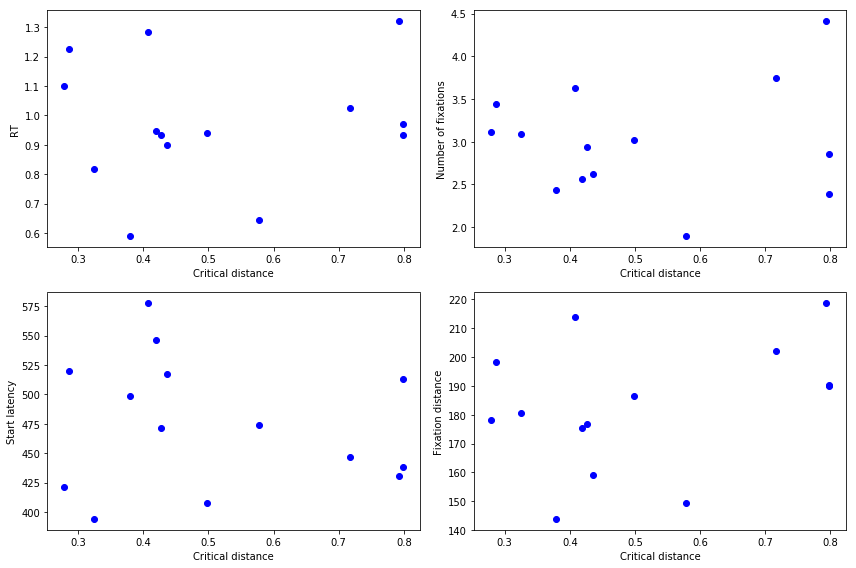

In [208]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(crit_distance[:,0],rt_ecc_mean[:,0], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('RT')

plt.subplot(2,2,2)
plt.plot(crit_distance[:,0],ecc_fix[:,0], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Number of fixations')

plt.subplot(2,2,3)
plt.plot(crit_distance[:,0],ecc_lat[:,0], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Start latency')

plt.subplot(2,2,4)
plt.plot(crit_distance[:,0],fix_dist[:,0], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Fixation distance')

plt.tight_layout()

**Eccentricity 8°**

In [209]:
print('Correlation of critical distance and RT:')
pearsonr(crit_distance[:,1],rt_ecc_mean[:,1])

Correlation of critical distance and RT:


(0.28116511024197804, 0.33016762868919236)

In [210]:
print('Correlation of critical distance and number of fixations:')
pearsonr(crit_distance[:,1],ecc_fix[:,1])

Correlation of critical distance and number of fixations:


(0.22828557465881885, 0.43246519740675016)

In [211]:
print('Correlation of critical distance and start latency:')
pearsonr(crit_distance[:,1],ecc_lat[:,1])

Correlation of critical distance and start latency:


(-0.07414703924959508, 0.801108738248214)

In [212]:
print('Correlation of critical distance and fixation distance:')
pearsonr(crit_distance[:,1],fix_dist[:,1])

Correlation of critical distance and fixation distance:


(0.2720404281409294, 0.3467584784663545)

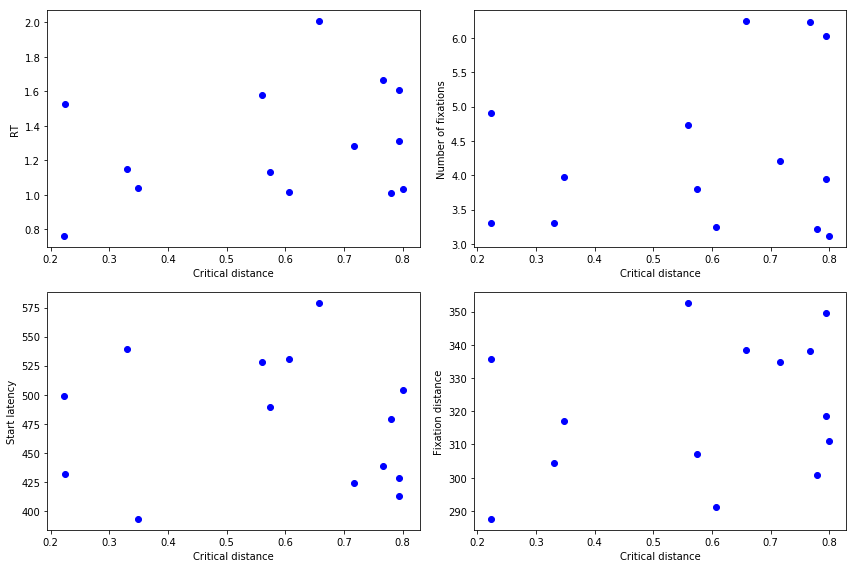

In [213]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(crit_distance[:,1],rt_ecc_mean[:,1], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('RT')

plt.subplot(2,2,2)
plt.plot(crit_distance[:,1],ecc_fix[:,1], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Number of fixations')

plt.subplot(2,2,3)
plt.plot(crit_distance[:,1],ecc_lat[:,1], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Start latency')

plt.subplot(2,2,4)
plt.plot(crit_distance[:,1],fix_dist[:,1], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Fixation distance')

plt.tight_layout()

**Eccentricity 12°**

In [214]:
print('Correlation of critical distance and RT:')
pearsonr(crit_distance[:,2],rt_ecc_mean[:,2])

Correlation of critical distance and RT:


(0.17556997751993894, 0.5482600794125301)

In [215]:
print('Correlation of critical distance and number of fixations:')
pearsonr(crit_distance[:,2],ecc_fix[:,2])

Correlation of critical distance and number of fixations:


(0.14884329242104077, 0.6115647355594465)

In [216]:
print('Correlation of critical distance and start latency:')
pearsonr(crit_distance[:,2],ecc_lat[:,2])

Correlation of critical distance and start latency:


(-0.15921439612325322, 0.5866668031897073)

In [217]:
print('Correlation of critical distance and fixation distance:')
pearsonr(crit_distance[:,2],fix_dist[:,2])

Correlation of critical distance and fixation distance:


(0.08478093382305689, 0.7732211612667906)

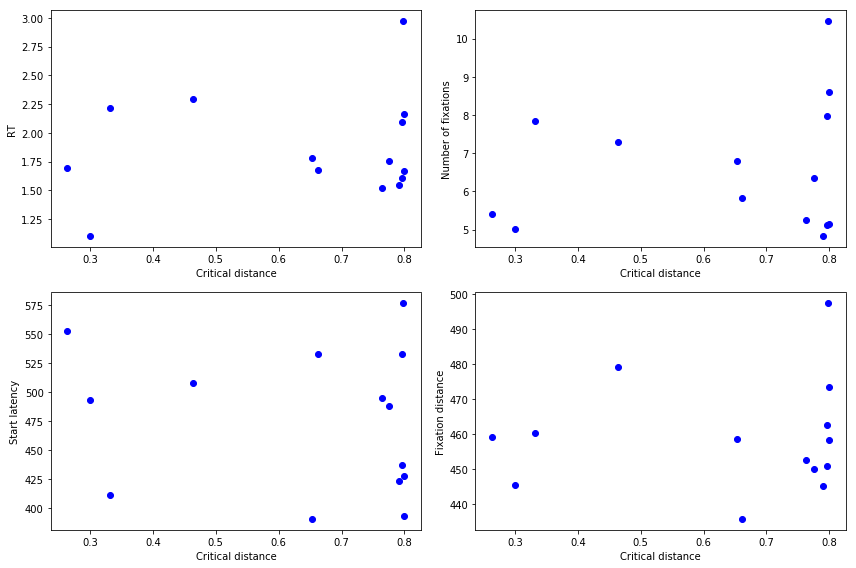

In [218]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(crit_distance[:,2],rt_ecc_mean[:,2], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('RT')

plt.subplot(2,2,2)
plt.plot(crit_distance[:,2],ecc_fix[:,2], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Number of fixations')

plt.subplot(2,2,3)
plt.plot(crit_distance[:,2],ecc_lat[:,2], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Start latency')

plt.subplot(2,2,4)
plt.plot(crit_distance[:,2],fix_dist[:,2], 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Fixation distance')

plt.tight_layout()

**Subject Means**


In [219]:
print('Correlation of critical distance and RT:')
pearsonr(crit_dist_mean,rt_mean)

Correlation of critical distance and RT:


(0.1507490909095687, 0.6069591033069359)

In [220]:
print('Correlation of critical distance and mean number of fixations:')
pearsonr(crit_dist_mean,mean_fix)

Correlation of critical distance and mean number of fixations:


(0.12697090010246287, 0.6653445598690629)

In [221]:
print('Correlation of critical distance and start latency:')
pearsonr(crit_dist_mean,mean_lat)

Correlation of critical distance and start latency:


(-0.15810046005355885, 0.5893213655261293)

In [222]:
print('Correlation of critical distance and fixation distance:')
pearsonr(crit_dist_mean,mean_fix_dist)

Correlation of critical distance and fixation distance:


(0.2767707771585172, 0.3381009706543261)

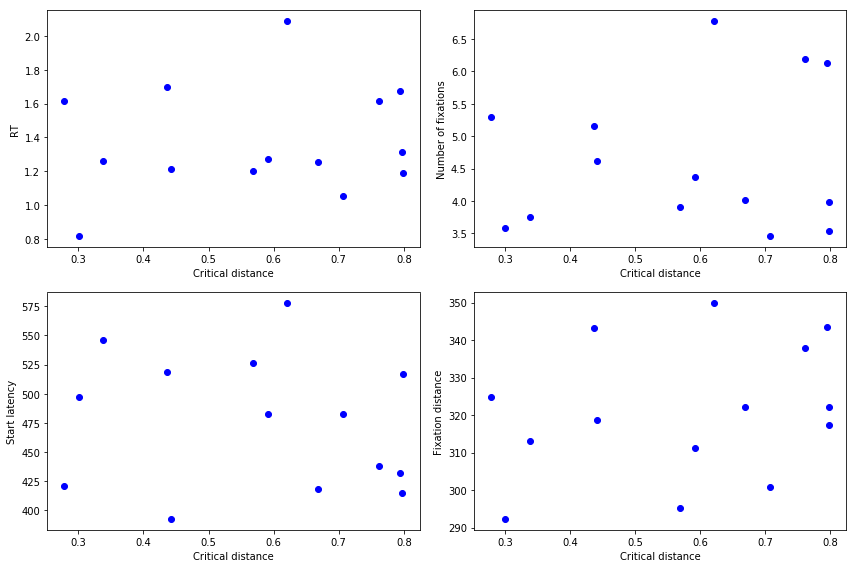

In [223]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(crit_dist_mean,rt_mean, 'bo')
plt.xlabel('Critical distance')
plt.ylabel('RT')

plt.subplot(2,2,2)
plt.plot(crit_dist_mean,mean_fix, 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Number of fixations')

plt.subplot(2,2,3)
plt.plot(crit_dist_mean,mean_lat, 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Start latency')

plt.subplot(2,2,4)
plt.plot(crit_dist_mean,mean_fix_dist, 'bo')
plt.xlabel('Critical distance')
plt.ylabel('Fixation distance')

plt.tight_layout()